In [3]:
from advectionplot import *
from glob import glob
import math  
import os


CASES = {
        '3Ddeformation_hex_BC-div-source-h_00000_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'noSource', 'BC': 'zeroGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00001_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'noSource', 'BC': 'zeroGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00002_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'noSource', 'BC': 'explicitGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00003_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'noSource', 'BC': 'explicitGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00004_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'noSource', 'BC': 'explicitMag1Gradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00005_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'noSource', 'BC': 'explicitMag1Gradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00006_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'explicit', 'BC': 'zeroGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00007_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'explicit', 'BC': 'zeroGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00008_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'explicit', 'BC': 'explicitGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00009_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'explicit', 'BC': 'explicitGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00010_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'explicit', 'BC': 'explicitMag1Gradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00011_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'explicit', 'BC': 'explicitMag1Gradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00012_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'simpleLinearImplicit', 'BC': 'zeroGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00013_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'simpleLinearImplicit', 'BC': 'zeroGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00014_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'simpleLinearImplicit', 'BC': 'explicitGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00015_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'simpleLinearImplicit', 'BC': 'explicitGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00016_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'simpleLinearImplicit', 'BC': 'explicitMag1Gradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00017_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'simpleLinearImplicit', 'BC': 'explicitMag1Gradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00018_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'strictNegativeSpLinearImplicit', 'BC': 'zeroGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00019_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'strictNegativeSpLinearImplicit', 'BC': 'zeroGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00020_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'strictNegativeSpLinearImplicit', 'BC': 'explicitGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00021_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'strictNegativeSpLinearImplicit', 'BC': 'explicitGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00022_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'strictNegativeSpLinearImplicit', 'BC': 'explicitMag1Gradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00023_3Ddeformation' : {'DIV': 'linear', 'SDPLS_SOURCE': 'strictNegativeSpLinearImplicit', 'BC': 'explicitMag1Gradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00024_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'noSource', 'BC': 'zeroGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00025_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'noSource', 'BC': 'zeroGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00026_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'noSource', 'BC': 'explicitGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00027_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'noSource', 'BC': 'explicitGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00028_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'noSource', 'BC': 'explicitMag1Gradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00029_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'noSource', 'BC': 'explicitMag1Gradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00030_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'explicit', 'BC': 'zeroGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00031_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'explicit', 'BC': 'zeroGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00032_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'explicit', 'BC': 'explicitGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00033_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'explicit', 'BC': 'explicitGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00034_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'explicit', 'BC': 'explicitMag1Gradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00035_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'explicit', 'BC': 'explicitMag1Gradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00036_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'simpleLinearImplicit', 'BC': 'zeroGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00037_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'simpleLinearImplicit', 'BC': 'zeroGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00038_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'simpleLinearImplicit', 'BC': 'explicitGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00039_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'simpleLinearImplicit', 'BC': 'explicitGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00040_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'simpleLinearImplicit', 'BC': 'explicitMag1Gradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00041_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'simpleLinearImplicit', 'BC': 'explicitMag1Gradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00042_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'strictNegativeSpLinearImplicit', 'BC': 'zeroGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00043_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'strictNegativeSpLinearImplicit', 'BC': 'zeroGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00044_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'strictNegativeSpLinearImplicit', 'BC': 'explicitGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00045_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'strictNegativeSpLinearImplicit', 'BC': 'explicitGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00046_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'strictNegativeSpLinearImplicit', 'BC': 'explicitMag1Gradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00047_3Ddeformation' : {'DIV': 'linearUpwind', 'SDPLS_SOURCE': 'strictNegativeSpLinearImplicit', 'BC': 'explicitMag1Gradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00048_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'noSource', 'BC': 'zeroGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00049_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'noSource', 'BC': 'zeroGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00050_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'noSource', 'BC': 'explicitGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00051_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'noSource', 'BC': 'explicitGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00052_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'noSource', 'BC': 'explicitMag1Gradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00053_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'noSource', 'BC': 'explicitMag1Gradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00054_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'explicit', 'BC': 'zeroGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00055_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'explicit', 'BC': 'zeroGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00056_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'explicit', 'BC': 'explicitGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00057_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'explicit', 'BC': 'explicitGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00058_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'explicit', 'BC': 'explicitMag1Gradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00059_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'explicit', 'BC': 'explicitMag1Gradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00060_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'simpleLinearImplicit', 'BC': 'zeroGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00061_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'simpleLinearImplicit', 'BC': 'zeroGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00062_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'simpleLinearImplicit', 'BC': 'explicitGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00063_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'simpleLinearImplicit', 'BC': 'explicitGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00064_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'simpleLinearImplicit', 'BC': 'explicitMag1Gradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00065_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'simpleLinearImplicit', 'BC': 'explicitMag1Gradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00066_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'strictNegativeSpLinearImplicit', 'BC': 'zeroGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00067_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'strictNegativeSpLinearImplicit', 'BC': 'zeroGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00068_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'strictNegativeSpLinearImplicit', 'BC': 'explicitGradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00069_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'strictNegativeSpLinearImplicit', 'BC': 'explicitGradient', 'N_CELLS': 64},
        '3Ddeformation_hex_BC-div-source-h_00070_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'strictNegativeSpLinearImplicit', 'BC': 'explicitMag1Gradient', 'N_CELLS': 32},
        '3Ddeformation_hex_BC-div-source-h_00071_3Ddeformation' : {'DIV': 'vanLeer', 'SDPLS_SOURCE': 'strictNegativeSpLinearImplicit', 'BC': 'explicitMag1Gradient', 'N_CELLS': 64},
}

In [4]:
STUDIES = {}
studyname = "3Dtranslation_hex"
h_refinements = 2
parameters = ['DIV', 'BC']
os.chdir('/home/julian/OpenFOAM/leia/cases/study_case_mesh_BC_div_source_h')
from dict_3Dtranslation_Variation import CASES


study_ID = 0
j = 0
for i, case in enumerate(sorted(CASES.keys())):
    # print(case)
    STUDIES[str(study_ID)] = {}
    j = j+1
    if j == h_refinements:
        j = 0
        study_ID = study_ID +1

study_ID = 0
j = 0
for i, case in enumerate(sorted(CASES.keys())):
    # print(case)
    STUDIES[str(study_ID)]['cases'] = []
    j = j+1
    if j == h_refinements:
        j = 0
        study_ID = study_ID +1

study_ID = 0
j = 0
for i, case in enumerate(sorted(CASES.keys())):
    # print(case)
    STUDIES[str(study_ID)]['cases'].append(case)
    j = j+1
    if j == h_refinements:
        j = 0
        study_ID = study_ID +1

study_ID = 0
j = 0
for i, case in enumerate(sorted(CASES.keys())):
    # print(case)
    string = ''
    for param in parameters:
        string = string + '_' + CASES[case][param]
    string = string.lstrip('_')
    STUDIES[str(study_ID)]['label'] = string
    j = j+1
    if j == h_refinements:
        j = 0
        study_ID = study_ID +1

# STUDIES


In [5]:
for key in sorted(STUDIES.keys()):
    group = STUDIES[key]
    # Sort cases
    group['cases'].sort()
    # Load leiaSetFields.csv
    group['leiaSetFields'] = agglomerate_dframe_2(group['cases'],csv_filename="leiaSetFields.csv")
    # Load leiaLevelSetFoam.csv
    group['leiaLevelSetFoam'] = agglomerate_dframe_2(group['cases'],csv_filename="leiaLevelSetFoam.csv")
    
    group['resolutions'] = group['leiaLevelSetFoam']["DELTA_X"].unique()
    
    group['Evmax'] = []
    group['Eg'] = []
    for resolution in group['resolutions']:
        advection_data = group['leiaLevelSetFoam'][group['leiaLevelSetFoam']["DELTA_X"] == resolution]
        group['Evmax'].append(advection_data["E_VOL_ALPHA"].max())
        group['Eg'].append(advection_data["E_GEOM_ALPHA"].iloc[-1])
    
    group["gradPsiError"] = []
    group['EgradPsimean'] = []
    group['EgradPsimax'] = []
    group['EnarrowGradPsimean'] = []
    group['EnarrowGradPsimax'] = []    
    for case in group['cases']:
        file = os.path.join(case, "gradPsiError.csv")
        if os.path.isfile(file) and os.path.getsize(file):
            group['gradPsiError'].append(pd.read_csv(file, header=0))
            currentdf = group['gradPsiError'][-1]
            group['EgradPsimean'].append(currentdf['MEAN_E_GRAD_PSI'].mean())
            group['EgradPsimax'].append(currentdf['MAX_E_GRAD_PSI'].max())
            group['EnarrowGradPsimean'].append(currentdf['MEAN_E_NARROW_GRAD_PSI'].mean())
            group['EnarrowGradPsimax'].append(currentdf['MAX_E_NARROW_GRAD_PSI'].max())
        else: 
            group['gradPsiError'].append(None)
            group['EgradPsimean'].append(None)
            group['EgradPsimax'].append(None)
            group['EnarrowGradPsimean'].append(None)
            group['EnarrowGradPsimax'].append(None)




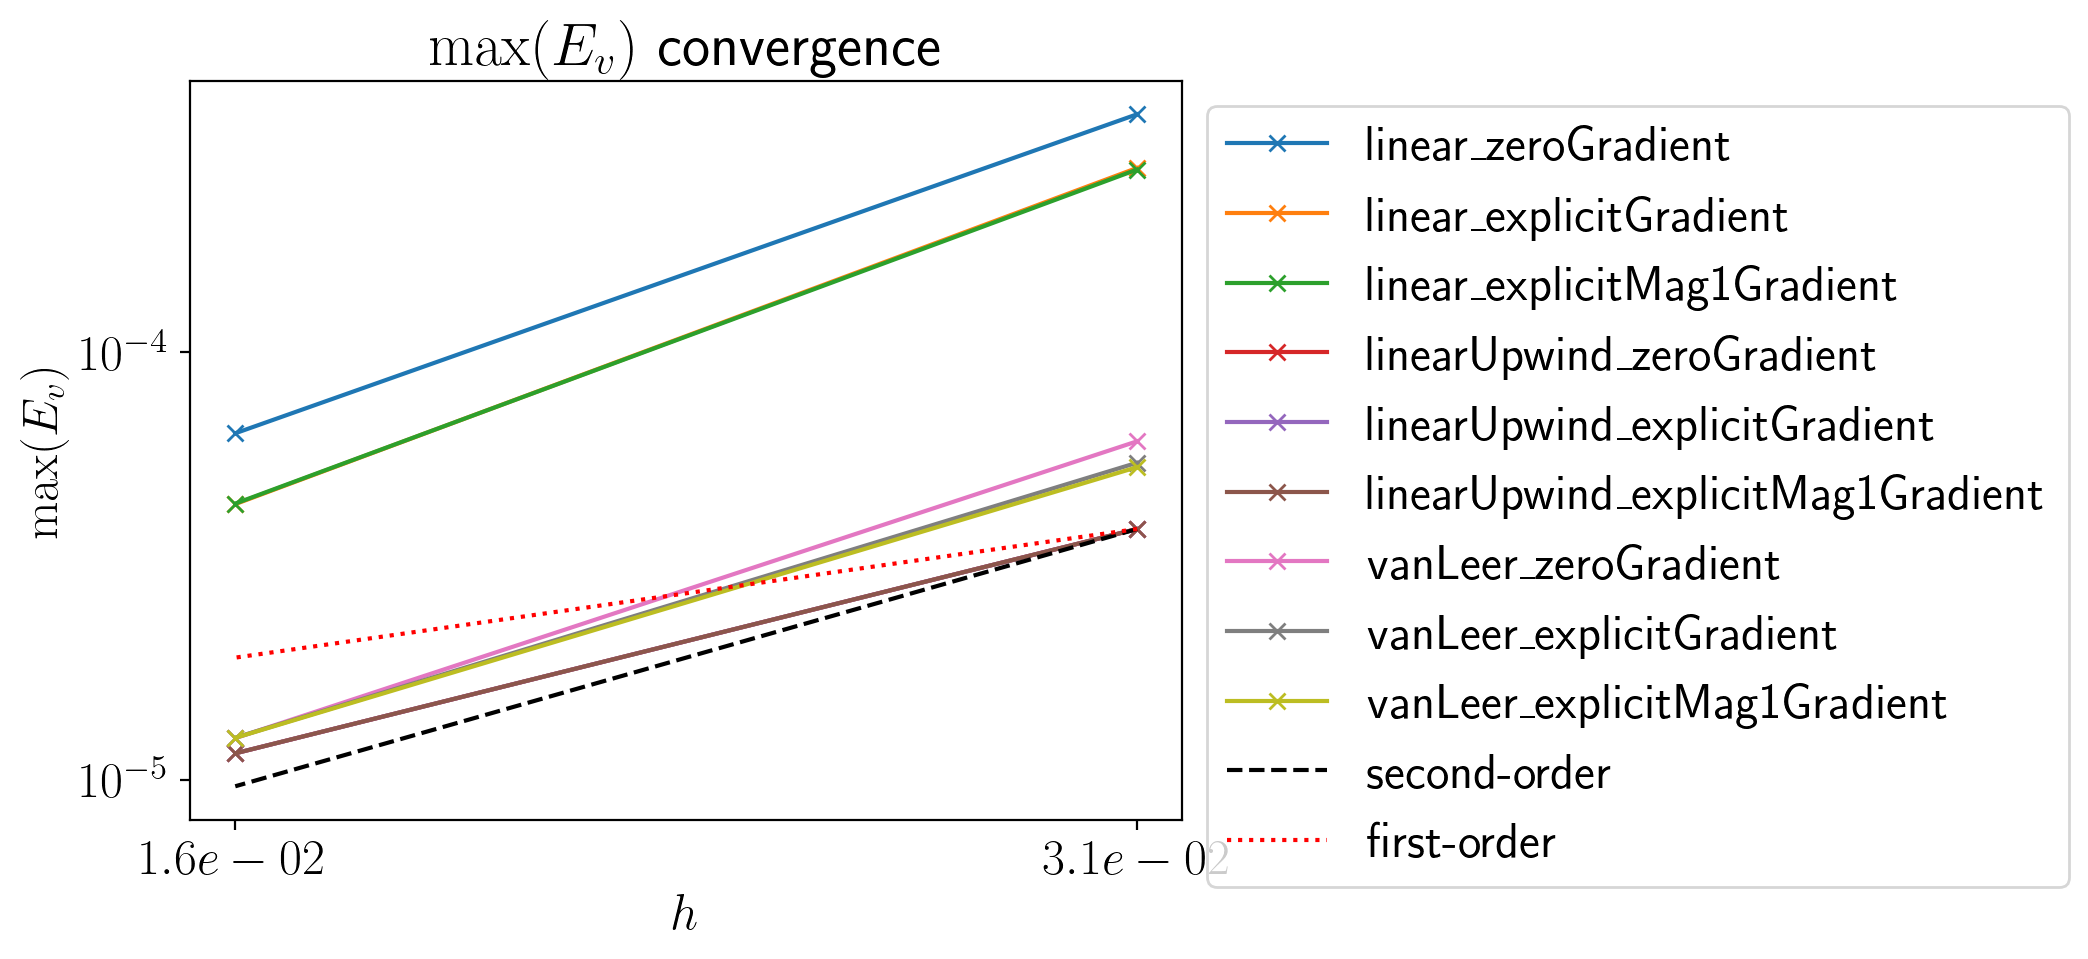

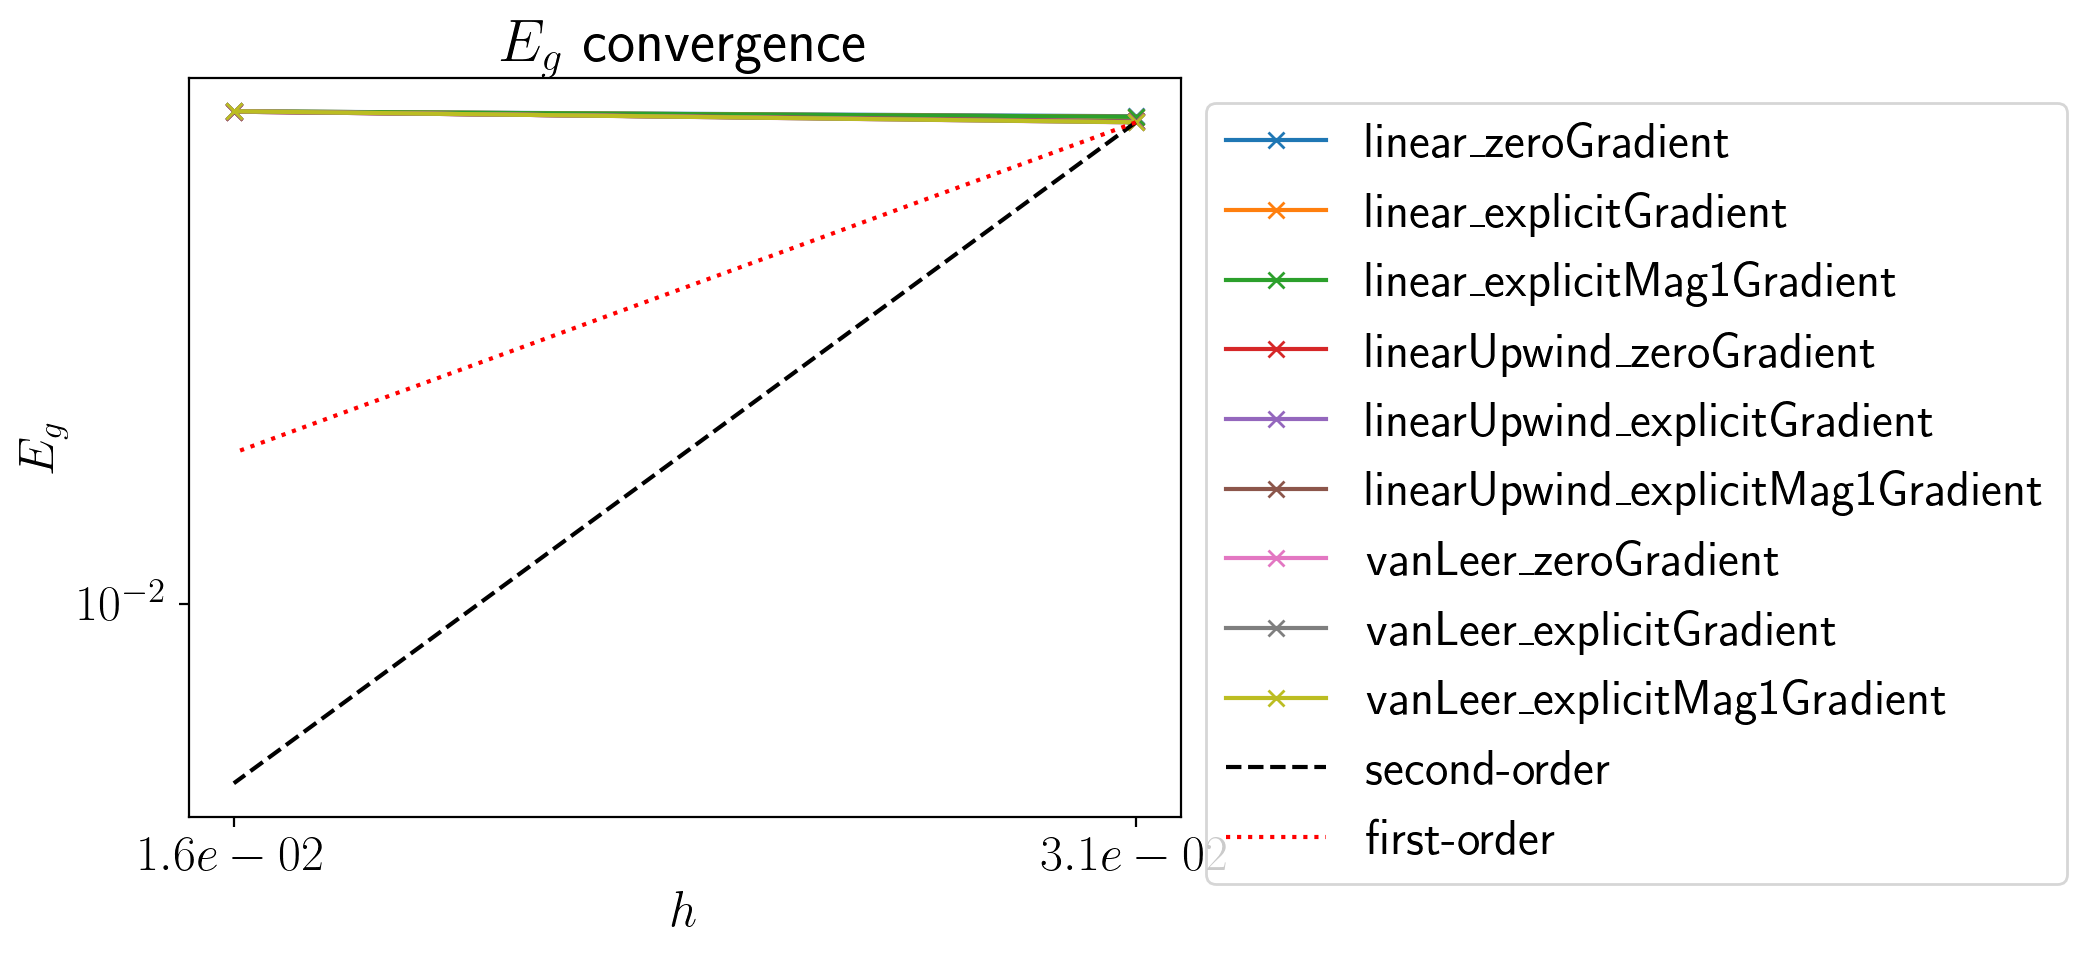

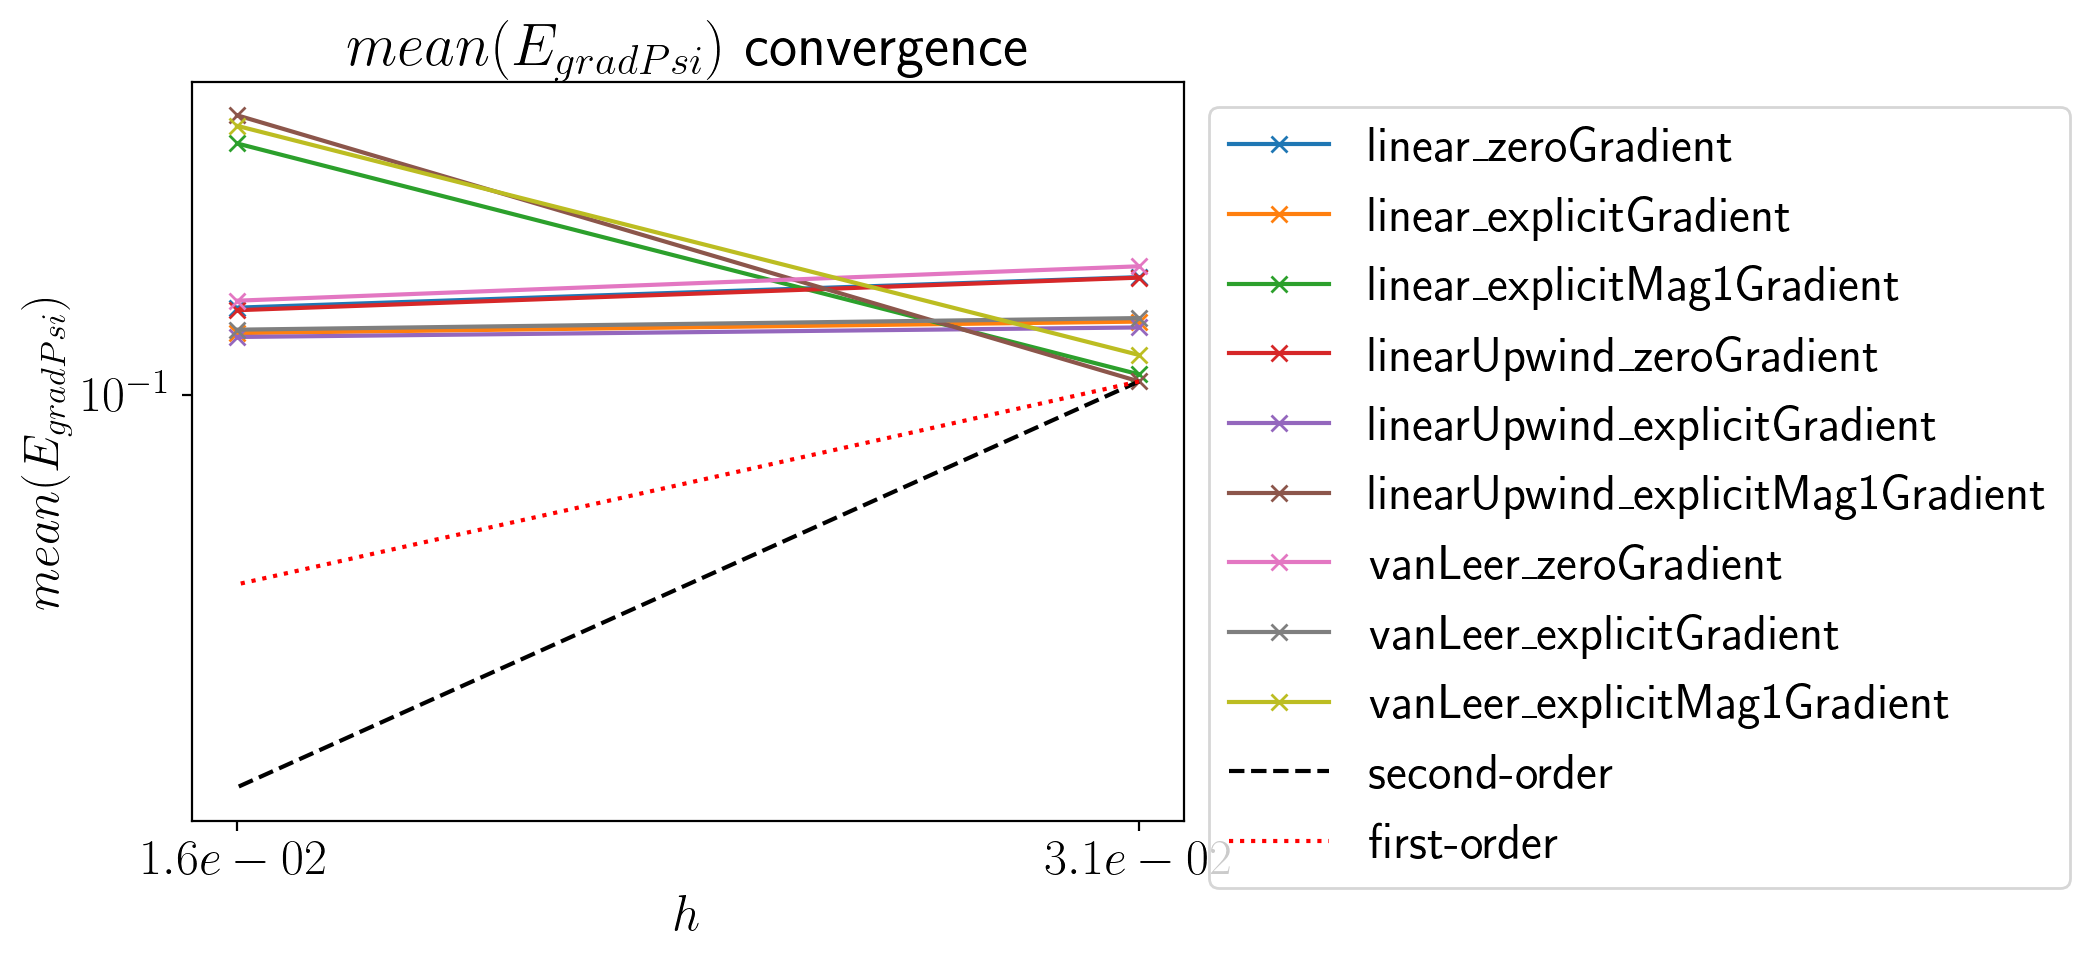

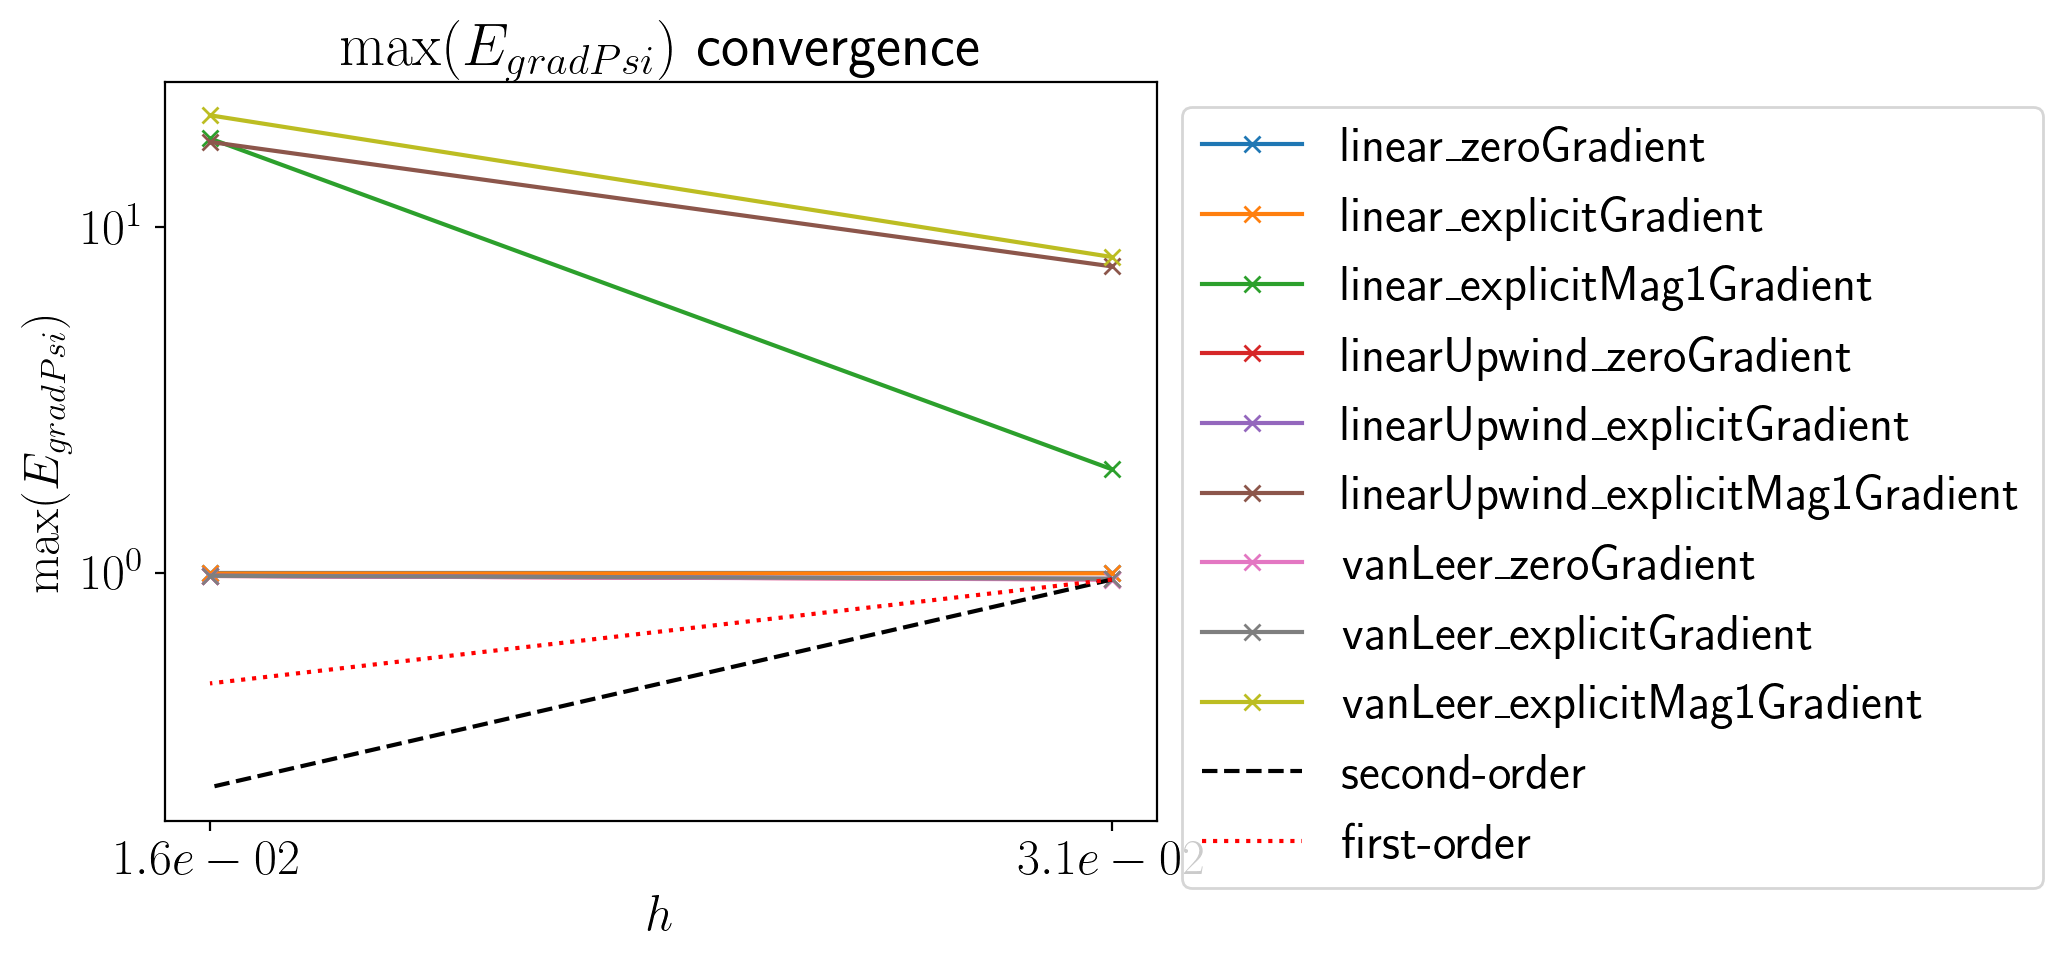

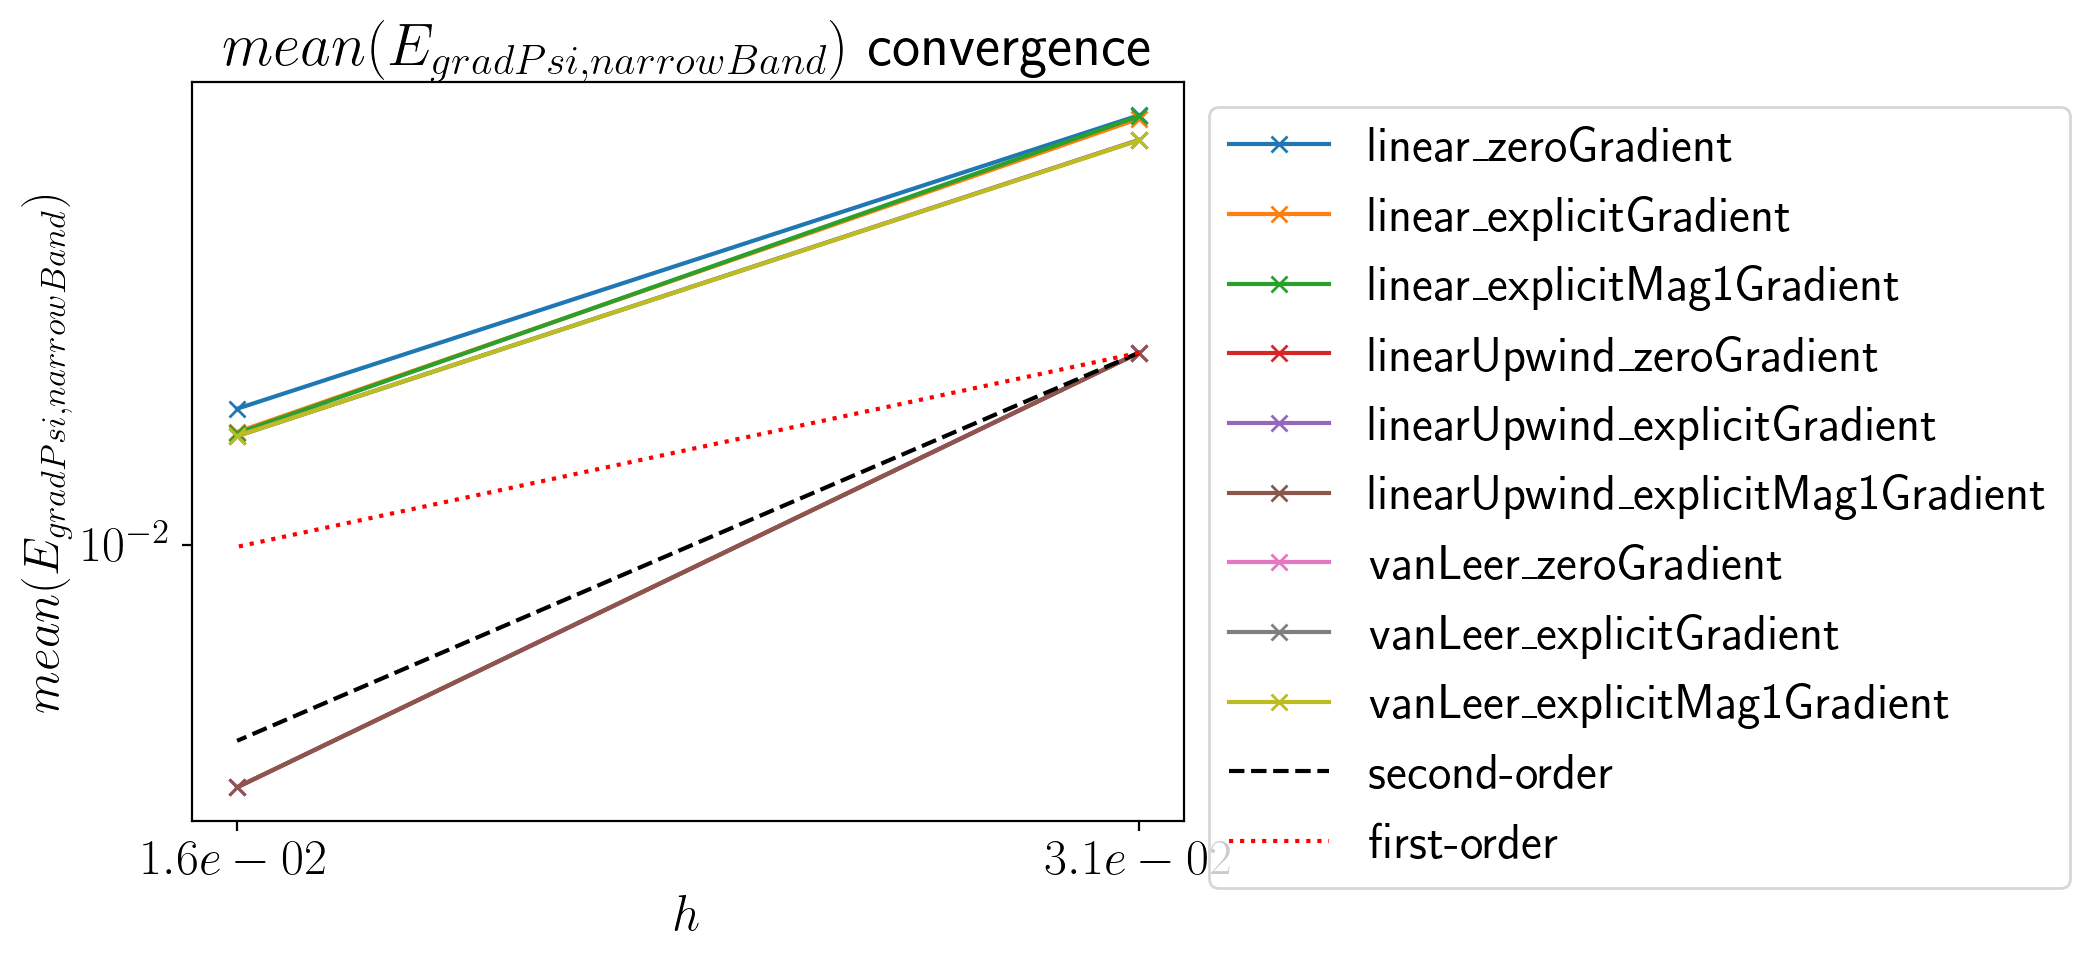

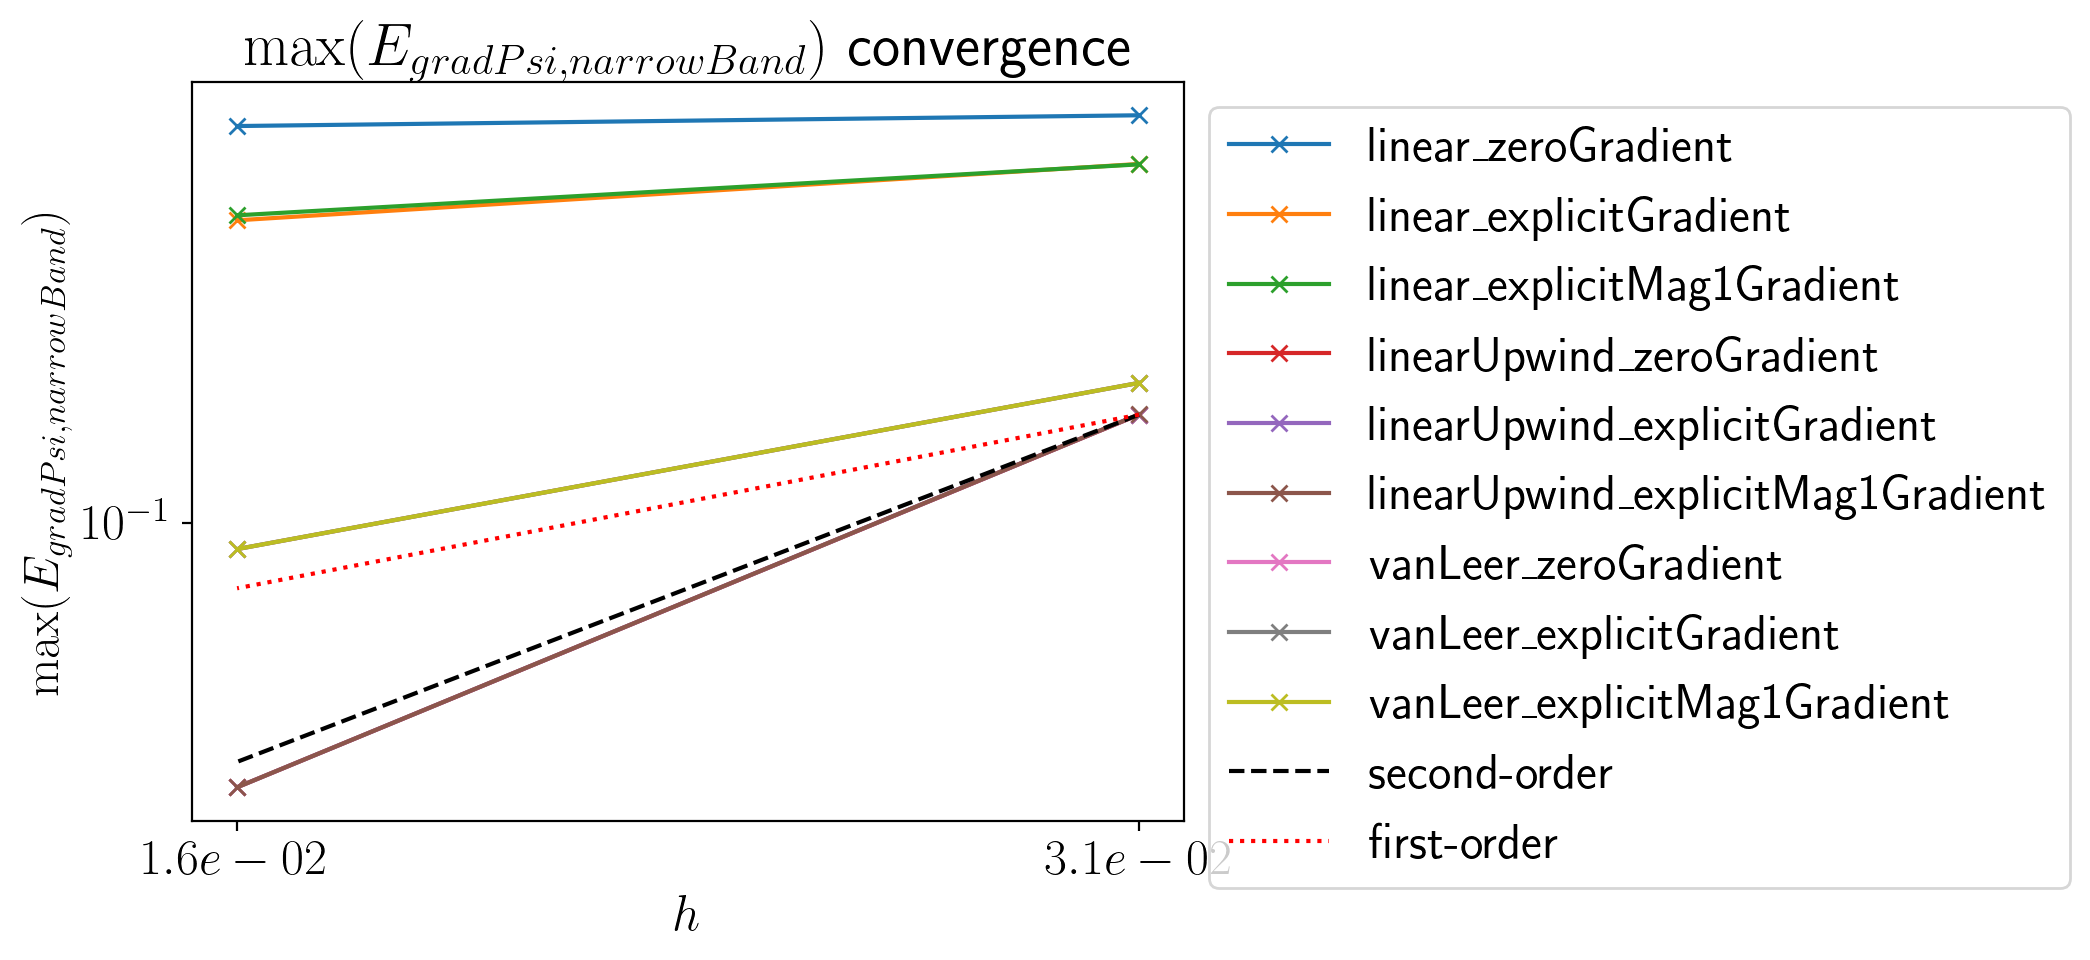

In [6]:
#-------------  USER INPUT  -------------------------------------------------------------

PLOT = [
    # (key, label, title, figname)

    # Ev MAX OVER DELTA_X PLOT 
    ("Evmax", "$\max(E_v)$", "$\max(E_v)$ convergence", f"{studyname}_Evmax_convergence"),
    # Eg - DELTA_X plot
    ("Eg", "$E_g$", "$E_g$ convergence", f"{studyname}_Eg_convergence"),
    # EgradPsi OVER DELTA_X PLOT 
    ('EgradPsimean', '$mean(E_{gradPsi})$', '$mean(E_{gradPsi})$ convergence', f"{studyname}_EgradPsimean"),
    ('EgradPsimax', '$\max(E_{gradPsi})$', '$\max(E_{gradPsi})$ convergence', f"{studyname}_EgradPsimax"),
    ('EnarrowGradPsimean', '$mean(E_{gradPsi,narrowBand})$', '$mean(E_{gradPsi,narrowBand})$ convergence', f"{studyname}_EnarrowGradPsimean"),
    ('EnarrowGradPsimax', '$\max(E_{gradPsi,narrowBand})$', '$\max(E_{gradPsi,narrowBand})$ convergence', f"{studyname}_EnarrowGradPsimax"),
]

#-----------------------------------------------------------------------------------------
REPRESENTATIVE_GROUP = group
h_01 = [REPRESENTATIVE_GROUP['leiaLevelSetFoam']["DELTA_X"].iloc[0],REPRESENTATIVE_GROUP['leiaLevelSetFoam']["DELTA_X"].iloc[-1]]
resolutions = REPRESENTATIVE_GROUP['resolutions']

cluster = []
groups = list(STUDIES.keys())
length = len(groups)
ncluster = math.ceil(length/10)

for j in range(ncluster):
    cluster.append(groups[j*10:((j+1)*10)])

for subgroupID ,subgroup in enumerate(cluster):
    for key, label, title, figname in PLOT:

        fig, ax = plt.subplots()

        # ax.set_prop_cycle(cycler('color', ['c', 'm', 'y', 'k']) +
        #             #    cycler('lw', [1, 2, 3, 4]) +
        #                cycler('linestyle', ['-', '--', ':', '-.']))

        ax.loglog()
        xtick_values = resolutions
        xtick_labels = [f'${value:.1e}$' for value in resolutions]
        ax.set_xticks(xtick_values, minor=False) 
        ax.set_xticklabels(xtick_labels)
        ax.minorticks_off()

        plt.title(title)

        convergence_ref = 1e6
        for study_key in sorted(subgroup):
            group = STUDIES[study_key]
            ax.plot(group['resolutions'], group[key], marker='x', label=group['label'])
            convergence_ref = min(convergence_ref, group[key][0])

        Ev_error2nd_01 = [convergence_ref, convergence_ref*(h_01[1]/h_01[0])**2]
        Ev_error1st_01 = [convergence_ref, convergence_ref*(h_01[1]/h_01[0])]

        ax.plot(h_01,Ev_error2nd_01,"k--",label="second-order")
        ax.plot(h_01,Ev_error1st_01,"r:",label="first-order")

        plt.ylabel(label)
        plt.xlabel("$h$")
        ax.legend(loc="upper left", bbox_to_anchor=(1,1))
        # ax.legend()
        plt.savefig(f"./figures/{figname}_{subgroupID}.pdf" , bbox_inches='tight')
        plt.savefig(f"./figures/{figname}_{subgroupID}.jpg" , bbox_inches='tight')
        plt.show()

In [7]:
ncluster

1